# CS 524
HW4
Sparsh Agarwal
9075905142

Q1.

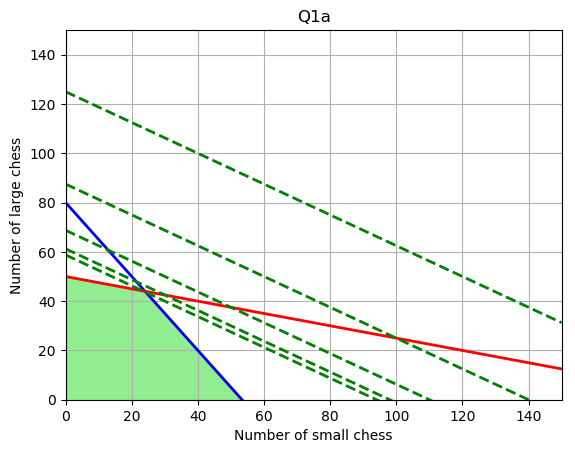

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x13e1e9450>

In [24]:
using PyPlot 

A = linspace(0,150,100) # returns an array of 100 evenly spaced numbers over the interval .

B1 = (160-3*A)/2
B2 = (200-A)/4
B4 = (1000 - 5A)/8
B5 = (700 - 5A)/8
B6 = (550 - 5A)/8
B7 = (490 - 5A)/8
B8 = (470 - 5A)/8

plot(A, B1, "b", linewidth = 2)
hold 
plot(A, B2, "r", linewidth = 2)
hold
plot(A, B4, "g--", linewidth = 2)
hold
plot(A, B5, "g--", linewidth = 2)
hold
plot(A, B6, "g--", linewidth = 2)
hold
plot(A, B7, "g--", linewidth = 2)
hold
plot(A, B8, "g--", linewidth = 2)

xlim([0, 150])
ylim([0, 150])

grid() # adds grid lines 
xlabel("Number of small chess") 
ylabel("Number of large chess")
title("Q1a")

fill([0, 53.33, 24, 0], [0, 0,44.00, 50], color= "lightgreen")
# 24 small ones and 44 large ones

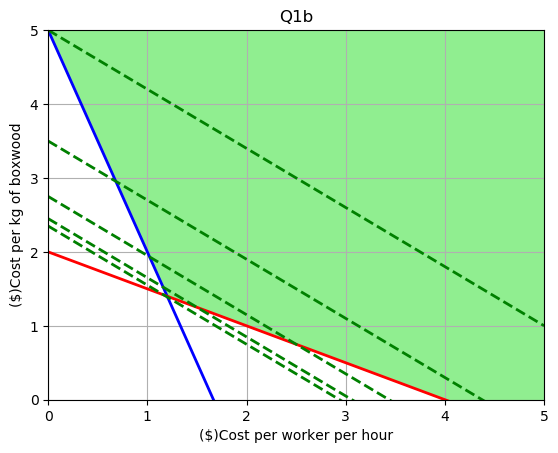

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x13e37dc90>

In [25]:
using PyPlot 

l1 = linspace(0,5,100) # returns an array of 100 evenly spaced numbers over the interval .

l21 = (5-3*l1)
l22 = (8-2*l1)/4
l23 = (1000 - 160l1)/200
l24 = (700 - 160l1)/200
l25 = (550 - 160l1)/200
l26 = (490 - 160l1)/200
l27 = (470 - 160l1)/200

plot(l1, l21, "b", linewidth = 2)
hold 
plot(l1, l22, "r", linewidth = 2)
hold
plot(l1, l23, "g--", linewidth = 2)
hold
plot(l1, l24, "g--", linewidth = 2)
hold
plot(l1, l25, "g--", linewidth = 2)
hold
plot(l1, l26, "g--", linewidth = 2)
hold
plot(l1, l27, "g--", linewidth = 2)

xlim([0, 5])
ylim([0, 5])

grid() # adds grid lines 
xlabel("\(\$\)Cost per worker per hour") 
ylabel("\(\$\)Cost per kg of boxwood")
title("Q1b")

fill([4, 5, 5, 0, 1.2], [0, 0 , 5, 5, 1.4], color= "lightgreen")

1.2 for cost per worker per hour and 1.4 for cost per kg of boxwood is optimal to break even with the profit from 24 small boxes and 44 big boxes bevause; 24x5 + 44x8 = 472, and 1.2x(3x24 + 44x2) + 1.4x(1x24 + 4x44) = 472

Q2.a)

In [26]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

In [27]:
using JuMP, Clp

m = Model(solver=ClpSolver())

@variable(m, 0 <= food_perc[foods] <=1 ) 

@expression(m, total_cost, sum(food_perc[i] for i in foods))

@constraint(m, constr[j in nutrients], sum(data[i,j] * food_perc[i] for i in foods ) >= lower[j] )

@objective(m, Min, total_cost)

solve(m)
# println(getvalue(food_perc))
println("Cost per pill (in dollars) : ",0.5*getdual(constr["Calcium (g)"]))

Cost per pill (in dollars) : 0.015868856722818517


b) With calcium supp, the optimal diet would contain  Wheat Flour (Enriched), Liver (Beef), Cabbage, Spinach, Calcium Supp.

In [28]:
# I modified the stigler.csv to add the calcium suppliment 

# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("stiglermod.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

In [29]:
using JuMP, Clp

m = Model(solver=ClpSolver())

@variable(m, 0 <= food_perc[foods] <=1 ) 

@expression(m, total_cost, sum(food_perc[i] for i in foods))

@constraint(m, constr[j in nutrients], sum(data[i,j] * food_perc[i] for i in foods ) >= lower[j] )

@objective(m, Min, total_cost)

solve(m)
# println(getvalue(food_perc))
println("Annual cost (in dollars) : ", getvalue(365*total_cost))
println("Annual savings (in dollars): ", 39.66173154546625-getvalue(365*total_cost))

Annual cost (in dollars) : 36.9982473745081
Annual savings (in dollars): 2.6634841709581565


Q3.a) Here we get that the required expression is minimum when either cos(t) or sin(t) is zero. That means either p-r or q-s need to be zero when p+q+r+s is min. Also the minimum is 1.  The minimum is related to t, as magnitude of cos(t)+sin(t) increases, the expression value increases. We get minimum value when magnitude of cos(t)+sin(t) is minimum.

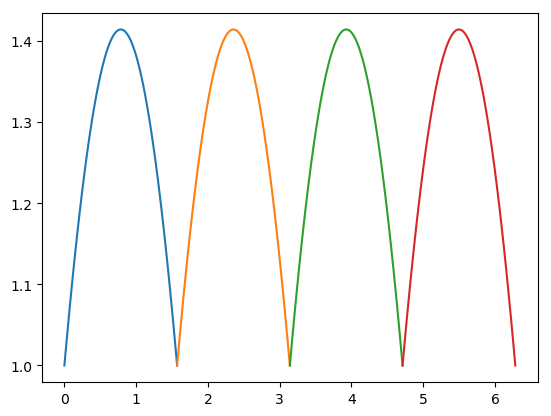

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13dc788d0>

In [30]:
using PyPlot
using JuMP,Clp

t1 = linspace(1.57079632679*0,1.57079632679*1,100)
t2 = linspace(1.57079632679*1,1.57079632679*2,100)
t3 = linspace(1.57079632679*2,1.57079632679*3,100)
t4 = linspace(1.57079632679*3,1.57079632679*4,100)

results1 = zeros(100)
for i in 1:100
    m = Model(solver=ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t1[i]))
    @constraint(m, q - s == sin(t1[i]))
    @expression(m, result, p+q+r+s)
    @objective(m, Min, result)
    solve(m)
    results1[i] = getvalue(result)
end
plot(t1, results1)

results2 = zeros(100)
for i in 1:100
    m = Model(solver=ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t2[i]))
    @constraint(m, q - s == sin(t2[i]))
    @expression(m, result, p+q+r+s)
    @objective(m, Min, result)
    solve(m)
    results2[i] = getvalue(result)
end
plot(t2, results2)

results3 = zeros(100)
for i in 1:100
    m = Model(solver=ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t3[i]))
    @constraint(m, q - s == sin(t3[i]))
    @expression(m, result, p+q+r+s)
    @objective(m, Min, result)
    solve(m)
    results3[i] = getvalue(result)
end
plot(t3, results3)

results4 = zeros(100)
for i in 1:100
    m = Model(solver=ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t4[i]))
    @constraint(m, q - s == sin(t4[i]))
    @expression(m, result, p+q+r+s)
    @objective(m, Min, result)
    solve(m)
    results4[i] = getvalue(result)
end

plot(t4, results4)

Q3. b)Here we get that the required expression is minimum when either cos(t) or sin(t) is zero. That means that either lambda1 or lambda2 needs to be zero for the expression to be minimum. This further provides us the information that since minimum of expression is 1, if lambda1 is zero then l2x(q-s) needs to be one. Also when we get the equations of duality we get that l1 and l2 (lambda1 and 2 respectively) can either be greater than 1 or less than -1. But for minimizing the expression as we found that one of them needs to be zero, if we plot l1=1, l1=-1, l2=-1, l2=1, and find closest solutions where either one of them is zero, we get optimal solutions.
Eg: If we choose l1=0, then l2 can either be 1 or -1. and for both we can find optimal minimum of expression at pi/2 and 3pi/2 respectively.

All this means that since l1 and l2 can either be >=1 or <=-1, for optimal solutions we can draw the circle with radius 1 and at the angle where we get intersections. Those angles and respective l1,l2 values would produce the minimum value of the required expression.

The solution also agrees with the solution found in part a.

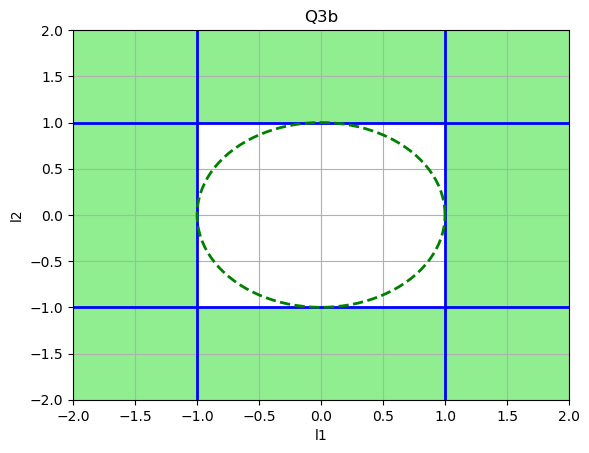

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x13e69ae10>

In [31]:
using PyPlot 

l1 = linspace(-2,2,100) # returns an array of 100 evenly spaced numbers over the interval .

l21 = 0*l1 - 1
l22 = 0*l1 + 1

plot(l1, l21, "b", linewidth = 2)
hold 
plot(l1, l22, "b", linewidth = 2)
hold
plot(l21, l1, "b", linewidth = 2)
hold 
plot(l22, l1, "b", linewidth = 2)
hold

rad = linspace(0, 2π, 100)
x =  cos.(rad)
y =  sin.(rad)
plot(x, y,"g--", linewidth = 2)

xlim([-2, 2])
ylim([-2, 2])

grid() # adds grid lines 
xlabel("l1") 
ylabel("l2")
title("Q3b")

fill([2, 2, -2, -2], [-2, 2 , 2, -2], color= "lightgreen")
fill([1, 1, -1, -1], [-1, 1 , 1, -1], color= "white")